# Simulación de un proceso MA(1) y bandas de confianza


### Oscar Julian Layton


Dada $\{ X_t\}$ una suceción de variables aleatorias no correlacionadas, el proceso MA(1) es tal que

$$ X_t =Z_t + \theta  Z_{t-1}  \;\;\;\; con\;\;\;\;  \{ Z_t\} \sim RB(0,\sigma^2) $$

Para realizar la simulacion de un proceso AR(1), se consideraran las siguientes condiciones  

In [2]:
import numpy as np     
import pandas as pd
import math 
import matplotlib.pylab as plt #libreria para graficar
from statsmodels.tsa.stattools import acf 
from statsmodels.graphics.tsaplots import plot_acf

In [3]:
n=200 #Tamaño de la serie
l=50 #condiciones iniciales
theta=0.5 
phi=0.5
sigma=2

ruido=np.random.normal(0, sigma, n+l)
MA1aux=np.zeros(n+l)
for t in range(1,n+l):
    MA1aux[t]=theta*ruido[t-1]+ruido[t]

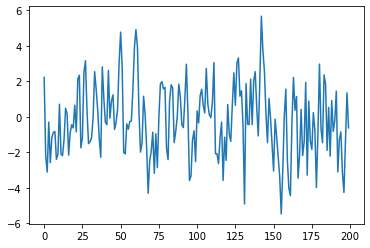

In [4]:
MA1=pd.Series(MA1aux[(l-1):(n+l-1)])
plt.plot(MA1)

Un intervalo de confiansa para $\rho \neq 0$ está dado por la siguiente expresión:

$$\widehat{\rho} \pm \frac{Z_{1-\frac{\alpha}{2}} \sqrt{1-3\widehat{\rho_1}^2 +4\widehat{\rho_1}^4 }}{\sqrt{n}}$$

Lo anterior es debido a que :

$$w_{ii} =\left\{\begin{matrix}
1-3\widehat{\rho_1}^2 +4\widehat{\rho_1}^4 & si & i=1\\ 
1+2\widehat{\rho_1}^2 & si  & i>1
\end{matrix}\right.$$

Todo lo anterior ya que $\rho_h = 0 $ , $|h|>1$  y para $h=1$ $\rho_h \neq 0 $ 



Una forma de establecer las bandas de confianza para el proceso es por medio de *acf* 

C:\Users\YULY\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


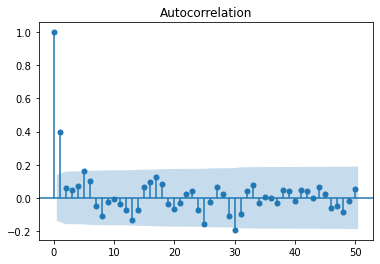

In [6]:
acf(MA1,nlags=50,unbiased=False)
x=plot_acf(MA1,lags=50,unbiased=False, alpha=0.05)

Se puede observar que solo la primera correlacion es significativa, es decir diferente de cero, con lo cual es valido afirmar que el proceso si es proveniente de un proceso AR(1)

---

C:\Users\YULY\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


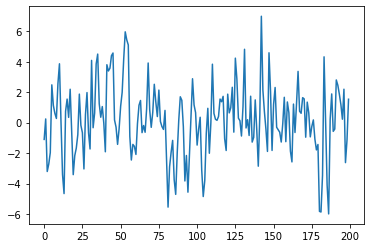

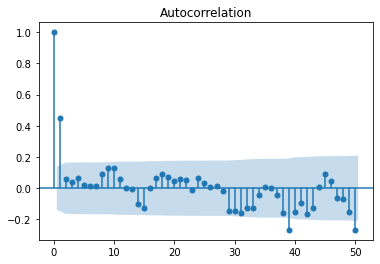

In [8]:
#####Simulación MA(1)#####
ruido=np.random.normal(0, sigma, n+l)
MA1aux=np.zeros(n+l)
for t in range(1,n+l):
    MA1aux[t]=theta*ruido[t-1]+ruido[t]


MA1=pd.Series(MA1aux[(l-1):(n+l-1)])
plt.plot(MA1)

acf(MA1,nlags=50,unbiased=False)

x=plot_acf(MA1,lags=50,unbiased=False, alpha=0.05)